# 1 Goals



*   Extend our regression model routines to support multiple features
*   Extend data structures to support multiple features
*   Rewrite prediction, cost and gradient routines to support multiple features
*   Utilize NumPy np.dot to vectorize their implementations for speed and simplicity




# 1.1 Tools

In [2]:
#  Change the current working directory so that Python can directly access the local utility modules in this folder
%cd /content/drive/MyDrive/Colab\ Notebooks/Machine_Learning_Algorithms/Supervised_Algorithms

/content/drive/MyDrive/Colab Notebooks/Machine_Learning_Algorithms/Supervised_Algorithms


In [4]:
# import libraries
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('deeplearning.mplstyle')
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

# 1.2 Notations

**Here is a summary of some of the notation you will encounter, updated for multiple features.**


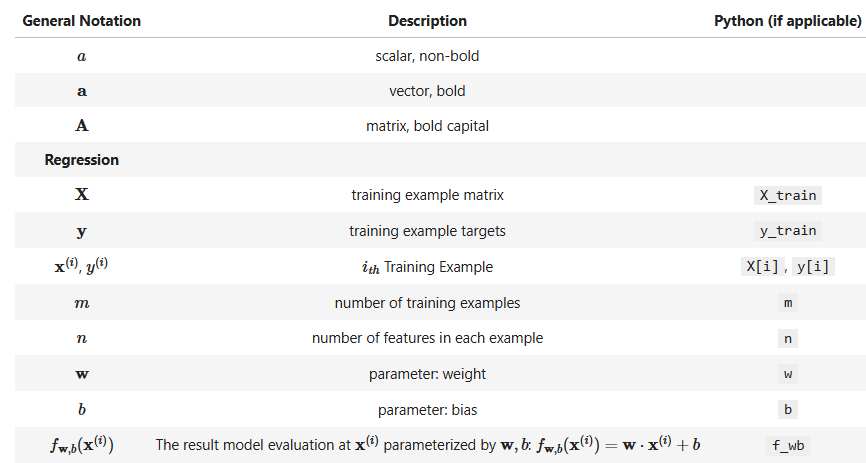

# 2 Problem Statement

**You will use the motivating example of housing price prediction.**
The training dataset contains three examples with four features (*size, bedrooms, floors and, age*) shown in the table below. Note that, unlike the earlier labs, size is in sqft rather than 1000 sqft. This causes an issue, which you will solve in the next lab!

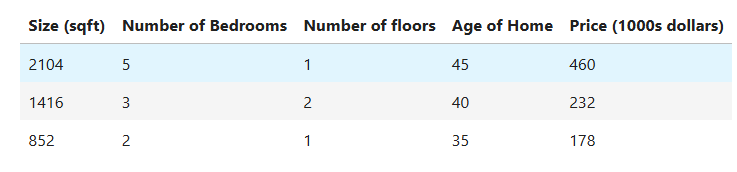

In [ ]:
#  Features
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
# Output Price
y_train = np.array([460, 232, 178])

# 2.1 Matrix X containing our examples

Similar to the table above, examples are stored in a NumPy matrix X_train.
Each row of the matrix represents one example. When you have
training examples (m is three in our example), and there are n features (four in our example),
X is a matrix with dimensions(m rows, n columns).

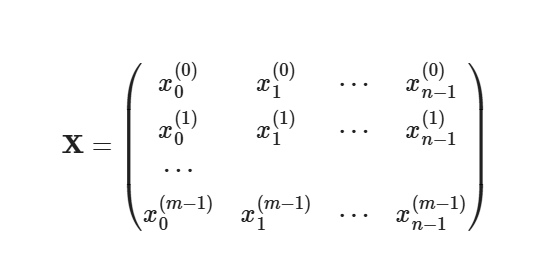

notation:

 X[i] is vector containing example i. X[i] = ( x[0][i], x[1][i], ..., x[n-1][i] )

 x[j][i] is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.

In [ ]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


# 2.2 Parameter vector w, b

*   w  is a vector with n elements, in our dataset, n is 4.
*   Each element contains the parameter associated with one feature.
*   notionally, we draw this as a column vector

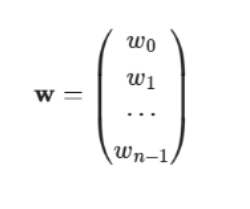

*   b is a scalar parameter.(single number)
*  For demonstration, w and b will be loaded with some initial selected values  that are near the optimal. w is a 1-D NumPy vector.

In [ ]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


# 3 Model Prediction With Multiple Variables

The model's prediction with multiple variables is given by the linear model:

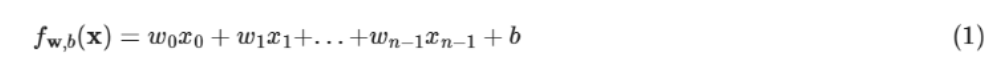

or in vector notation:

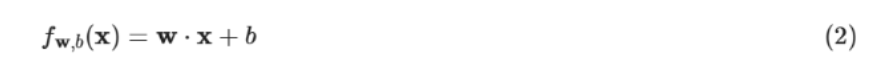

where: w and x are vectors, and '.' is a vector dot product

To demonstrate the dot product, we will implement prediction using (1) and (2).

# 3.1 Single Prediction element by element

Our previous prediction multiplied one feature value by one parameter and added a bias parameter. A direct extension of our previous implementation of prediction to multiple features would be to implement (1) above using loop over each element, performing the multiply with its parameter and then adding the bias parameter at the end.

In [ ]:
def predict_single_loop(x, w, b):
    """
    single predict using linear regression

    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters
      b (scalar):  model parameter

    Returns:
      p (scalar):  prediction
    """

    n=x.shape[0]
    p=0
    for i in range(n):
      p_i=x[i]*w[i]
      p+=p_i

    p+=b
    return p


In [ ]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec,w_init,b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


# 3.2 Single Prediction, vector

Noting that equation (1) above can be implemented using the dot product as in (2) above. We can make use of vector operations to speed up predictions.

Recall from the Python/Numpy lab that NumPy np.dot()[link] can be used to perform a vector dot product.

In [ ]:
def predict(x, w, b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters
      b (scalar):             model parameter

    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x,w)+b
    return p

In [ ]:

# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


# 4 Compute Cost With Multiple Variables

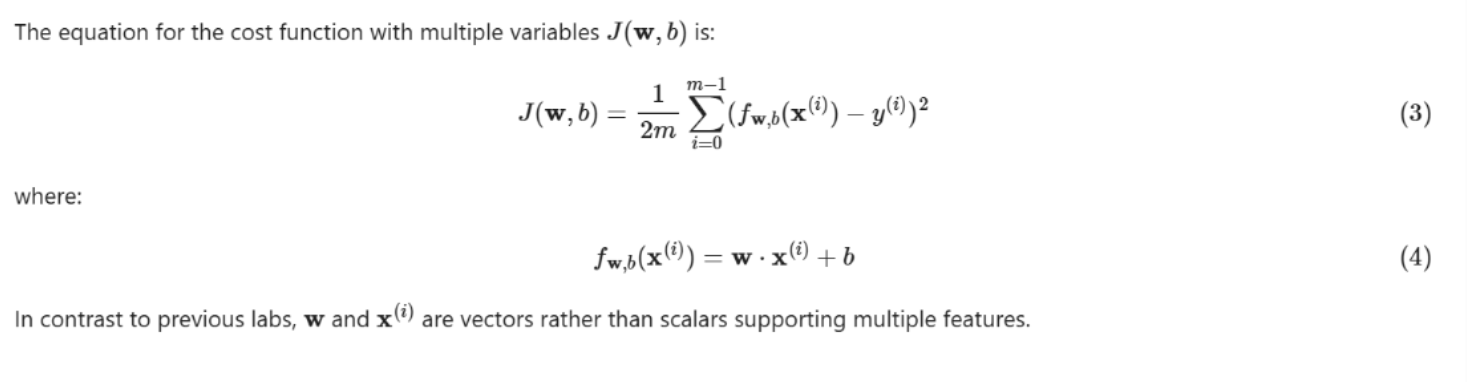

Below is an implementation of equations (3) and (4). Note that this uses a standard pattern for this course where a for loop over all m examples is used.

In [ ]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m=X.shape[0]
    cost=0.0
    for i in range(m):
      f_wb_i = np.dot(w,X[i])+b
      cost+= (f_wb_i-y[i])**2

    cost/=(2*m)
    return cost

In [ ]:
cost = compute_cost(X_train,y_train,w_init,b_init)
print(f'Cost at initial w : {cost}')

Cost at initial w : 1.5578904428966628e-12


# 5 Gradient Descent With Multiple Variables

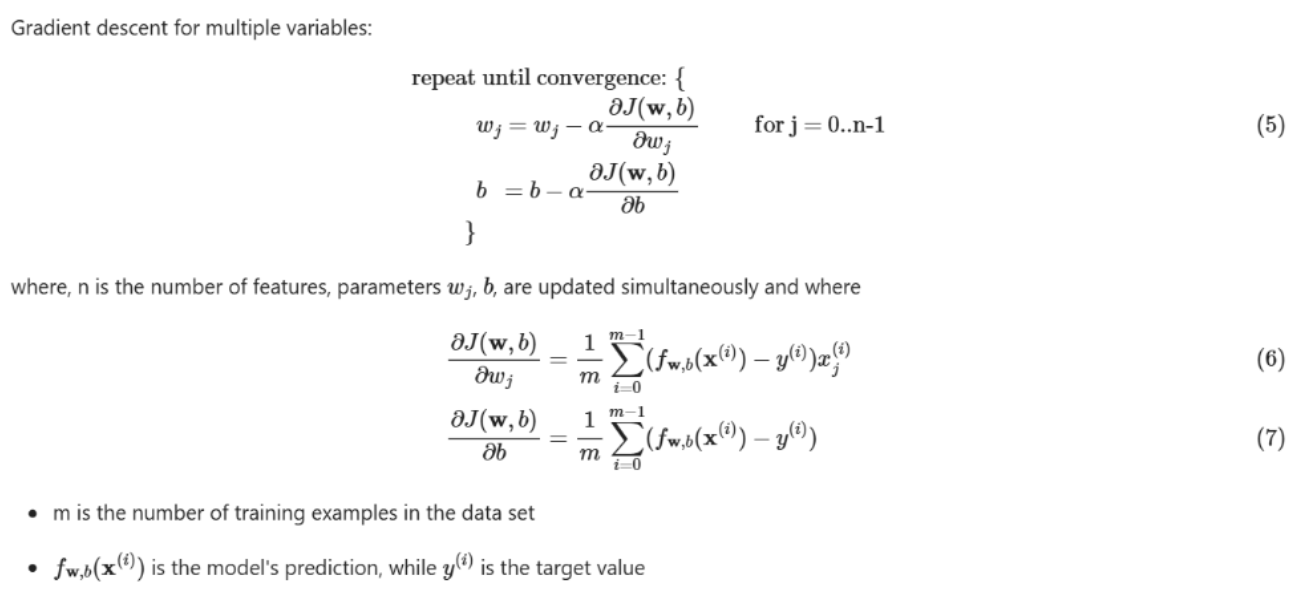

# 5.1 Compute Gradient with Multiple Variables

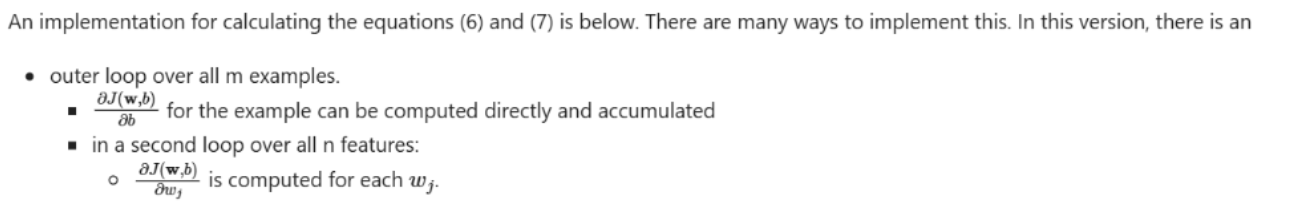

In [ ]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """

    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
      err = (np.dot(X[i], w) + b) - y[i]
      dj_db += err
      for j in range(n):
        dj_dw[j] += err * X[i, j]
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_db, dj_dw

In [ ]:
#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


# 5.2 Gradient Descent With Multiple Variables

The routine below implements equation (5) above.

In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    for i in range(num_iters):
      # Calculate the gradient (Deravtive)
        dj_db,dj_dw=gradient_function(X,y,w,b)
      # update the parameters
        w-=alpha*dj_dw
        b-=alpha*dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
          J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10

        if i%math.ceil(num_iters/10)  ==0:
          print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history #return final w,b and J history for graphing



next to test the implementation.

In [ ]:
# initialize parameters
init_w = np.zeros_like(w_init)
init_b = 0.

# some gradient descent settings
iteration = 1000
alpha = 5.0e-7
# run gradient descent
w_final,b_final,J_hist = gradient_descent(X_train,y_train,init_w,init_b,compute_cost,compute_gradient,alpha,iteration)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
  print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   
Iteration  100: Cost   695.99   
Iteration  200: Cost   694.92   
Iteration  300: Cost   693.86   
Iteration  400: Cost   692.81   
Iteration  500: Cost   691.77   
Iteration  600: Cost   690.73   
Iteration  700: Cost   689.71   
Iteration  800: Cost   688.70   
Iteration  900: Cost   687.69   
b,w found by gradient descent: -0.00,[ 0.2   0.   -0.01 -0.07] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


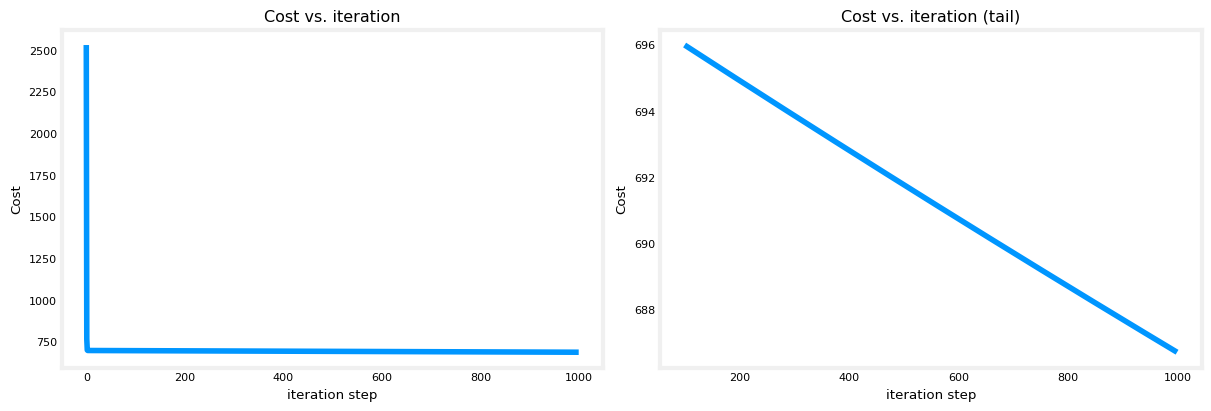

In [ ]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()